<a href="https://colab.research.google.com/github/pedr19faria/icfis/blob/master/Atividade2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
%matplotlib inline


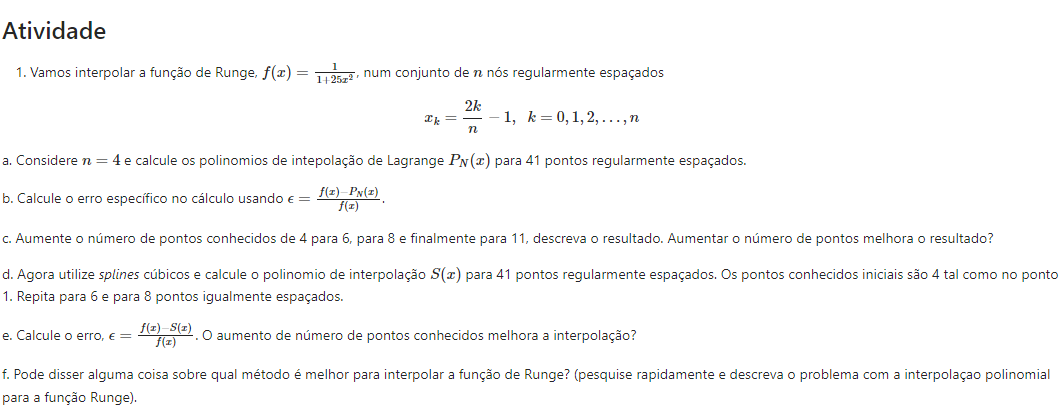

In [2]:
# Neville Algorithm:
#
# O algoritmo tem 3 partes, 
# Na primeira encontra o indice mais proximo do
# valor de x onde se quer estimar f(x)
def polint(xa,ya,x):
    n = xa.size
    c = np.copy(ya)
    d = np.copy(ya)
    ns=1
    dy = 0.
    # dif eh a diferenca do valor de entrada x com o primeiro valor 
    # de nossos dados xa[0]
    # dift eh um array, com a diferenca entre x e cada um dos xa
    dif = abs(x - xa[0])
    dift = np.abs(x - xa)
    for i in range (n):
        if (dift[i] < dif):
            ns = i
            dif = dift[i]
    # depois desse loop ns é o índice de xa mais próximo de x
    # ya é o valor de ya nesse indice
    y = ya[ns]
    ns = ns-1
    
    # Segunda parte: calcula os polinomios C e D de esquerda 
    # a direita, no loop mais externo m vai desde o primeiro ponto, m=0
    # até o penultimo ponto n-2
    for m in range(n-1):
        # o loop interno inicialmente tem n-1 elementos
        # esse número vai diminuindo em 1 a cada iteracao
        for i in range(0,(n-m-1)):
            ho = xa[i] - x
            hp = xa[i+m+1] - x
            w = c[i+1]-d[i]
            den = ho - hp
            if (den == 0):
                print('Error, den=0')
                break
            den = w/den
            d[i] = hp*den
            c[i] = ho*den
                
        #Terceira parte: Escolhemos o caminho pelo qual o erro é 
        # mínimo. 
        if (2*ns < n-m-2):
            dy = c[ns+1]
        else:
            dy = d[ns]
            ns = ns-1
        y = y+dy
    return y, dy

In [3]:
### Função a ser interpolada:
def f(x):
  f = 1/(1+ 25*(x**2))
  return f
def xnos(n =4):
  k = np.linspace(0,n,n+1) 
  return ((2*k)/n ) - 1

### Pega 5 pontos

In [4]:
y = f(xnos())
x = np.linspace(-1.,1.,41)
err = np.zeros_like(x)
pl = np.zeros_like(x)
for k in range(len(x)):
    pl[k], err[k] = polint(xnos(),y,x[k])
### A partir dos 5 pontos pega 41 outros para fazer o polinômio

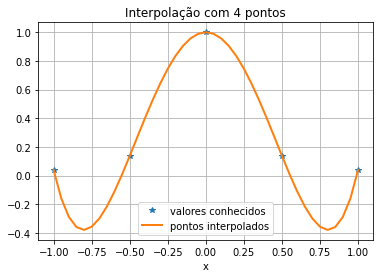

In [5]:
plt.plot(xnos(),y,'*', label='valores conhecidos')
plt.plot(x,pl, '-', lw=2, label='pontos interpolados')
plt.xlabel('x')
plt.title('Interpolação com 4 pontos')
plt.legend()
plt.grid()


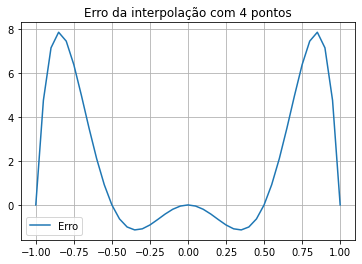

In [6]:
erro = np.zeros_like(pl)
for k in range(len(pl)):
  erro[k] = (f(x)[k] - pl[k])/f(x)[k]
plt.plot(x, erro, label = 'Erro')
plt.title('Erro da interpolação com 4 pontos')
plt.legend()
plt.grid()

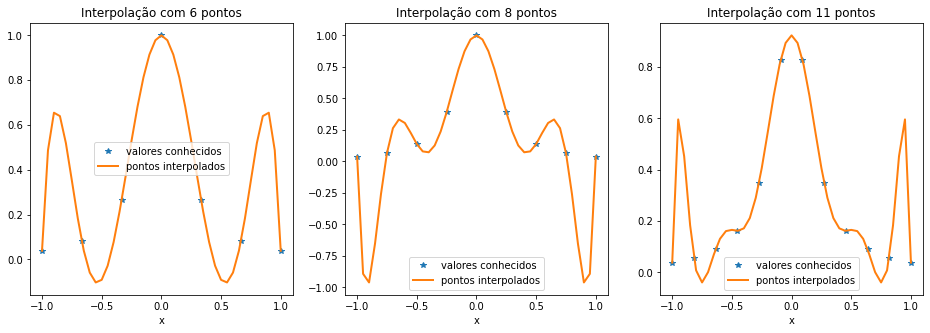

In [7]:
#Interpolação polinomial da função f(x) com mais pontos e suas respectivas representações gráficas
p6 = np.zeros_like(x)
p8 = np.zeros_like(x)
p11 = np.zeros_like(x)
err6 = np.zeros_like(x)
err8 = np.zeros_like(x)
err11 = np.zeros_like(x)
for k in range(len(x)):
    p6[k], err6[k] = polint(xnos(n=6),f(xnos(n=6)),x[k])
    p8[k], err8[k] = polint(xnos(n=8),f(xnos(n=8)),x[k])
    p11[k], err11[k] = polint(xnos(n=11),f(xnos(n=11)),x[k])

fig, ax = plt.subplots(1,3, figsize = (16,5))
ax[0].plot(xnos(6),f(xnos(6)), '*', label='valores conhecidos')
ax[0].plot(x,p6, '-', lw=2, label='pontos interpolados')
ax[1].plot(xnos(8),f(xnos(8)),'*', label='valores conhecidos')
ax[1].plot(x,p8, '-', lw=2, label='pontos interpolados')
ax[2].plot(xnos(11),f(xnos(11)),'*', label='valores conhecidos')
ax[2].plot(x,p11, '-', lw=2, label='pontos interpolados')
ax[0].set_xlabel('x')
ax[1].set_xlabel('x')
ax[2].set_xlabel('x')
ax[0].set_title('Interpolação com 6 pontos')
ax[1].set_title('Interpolação com 8 pontos')
ax[2].set_title('Interpolação com 11 pontos')
ax[0].legend()
ax[1].legend()
ax[2].legend()



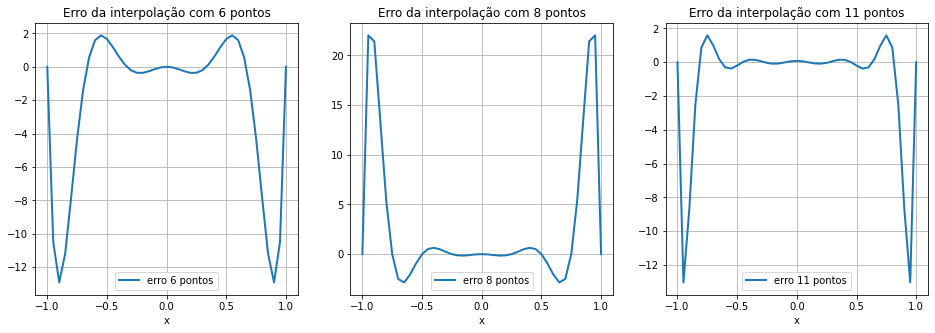

In [8]:
### Erro:
erro6 = np.zeros_like(p6)
erro8 = np.zeros_like(p8)
erro11 = np.zeros_like(p11)
for k in range(len(x)):
  erro6[k] = (f(x)[k] - p6[k])/f(x)[k]
  erro8[k] = (f(x)[k] - p8[k])/f(x)[k]
  erro11[k] = (f(x)[k] - p11[k])/f(x)[k]
fig, ax = plt.subplots(1,3, figsize = (16,5))

ax[0].plot(x,erro6, '-', lw=2, label='erro 6 pontos')

ax[1].plot(x,erro8, '-', lw=2, label='erro 8 pontos')

ax[2].plot(x,erro11, '-', lw=2, label='erro 11 pontos')
ax[0].set_xlabel('x')
ax[1].set_xlabel('x')
ax[2].set_xlabel('x')
ax[0].set_title('Erro da interpolação com 6 pontos')
ax[1].set_title('Erro da interpolação com 8 pontos')
ax[2].set_title('Erro da interpolação com 11 pontos')
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[0].grid()
ax[1].grid()
ax[2].grid()

Erro muito grande nos cantos, principalmente, e zero nos pontos em que conhecemos.

O aumento do número de pontos piora o resultado.

In [ ]:
### Agora vamos fazer usando o método de splines cúbicos:

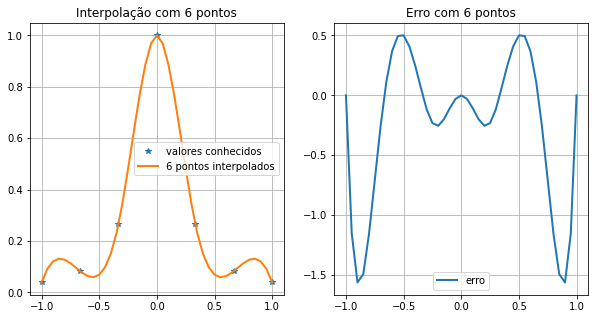

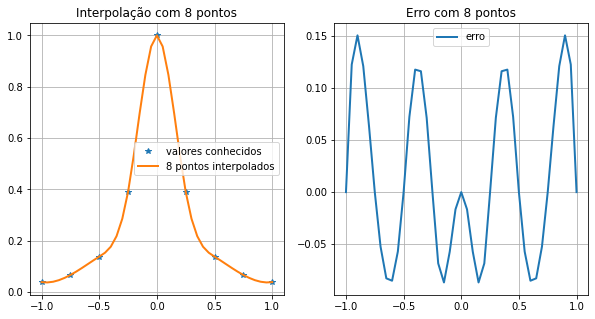

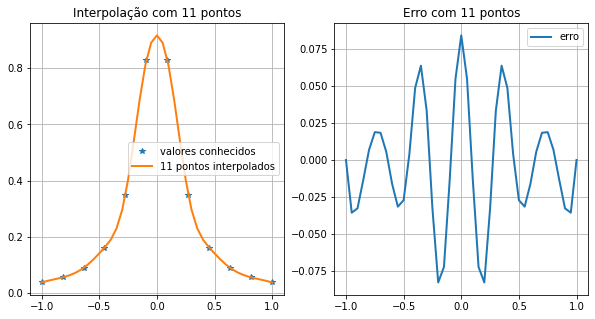

In [9]:
def plot_splines(n, x): ### Função para fazer a interpolação cúbica e plotar os gráficos para os pontos desejados
  y = f(xnos(n))
  f3 = interp1d(xnos(n), y, kind='cubic')
  erro = [((f(x)[k] - f3(x)[k])/f(x)[k]) for k in range(len(x))]

  fig, ax = plt.subplots(1,2, figsize = (10,5))
  ax[0].plot(xnos(n),f(xnos(n)), '*', label='valores conhecidos')
  ax[0].plot(x,f3(x), '-', lw=2, label=f'{n} pontos interpolados')
  ax[0].set_title(f'Interpolação com {n} pontos')
  ax[1].plot(x,erro, '-', lw=2, label=f'erro')
  ax[1].set_title(f'Erro com {n} pontos')
  ax[0].grid()
  ax[1].grid()
  ax[0].legend()
  ax[1].legend()
plot_splines(6, x )
plot_splines(8,x)
plot_splines(11,x)

Percebe-se que enquanto com o Algoritmo de Neville as curvas pioram a medida que se interpola mais pontos, no caso dos splines cúbicos a adição de pontos permite o desenvolvimento de uma curva melhor. Isso pode ser visto, tanto ao observar o gráfico de cada curva, quanto ao analisar o gráfico dos erros. No caso do Algoritmo de Neville, pode-se observar que o erro é bem maior no começo e no final do gráfico com valores altos e, por isso, que ocorre esses picos nos cantos das curvas que distoam da verdadeira curva dessa função. Com os método de Splines Cúbicos, percebe-se que isso não acontece, o erro tem uma ordem de grandeza bem menor nos valores que não conhecemos - já que naqueles que conhecemos, o erro é zero- e a curva visivelmente fica cada vez mais parecida com a da função.

 Na função de Runge ocorre o chamado Fenomêno de Runge: o aumento de pontos equidistantes provoca uma piora na representação da função, se distanciando da curva desejada e esse erro se concentra nas bordas do intervalo, como visto no exercício (c). Uma maneira de interpolar sem ter esse problema é pegando pontos mais adequados, os Pontos de Chebyshev, que são valores que não são equidistantes e estão concentrados nas bordas. Um bom método de interpolação que evita o acontecimento desse fenomêno é a realização de uma interpolação por partes. Se temos n + 1 pontos ao invés de criar um polinômio de grau n, separariamos esses n + 1 pontos na maneira desejada, por exemplo, separariamos em n problemas de interpolação menor, criando então vários polinômios de grau 1. Mas pode-se dividir também pegando mais pontos para cada  subintervalo e criar polinômio de grau maior, porém deve-se manter em grau baixo para que o fenomêno de Runge não apareça novamente. Com cada vez mais pontos e mais subintervalos desse polinômio, menor será o erro, tendendo este a zero.

### **Questão 2:**
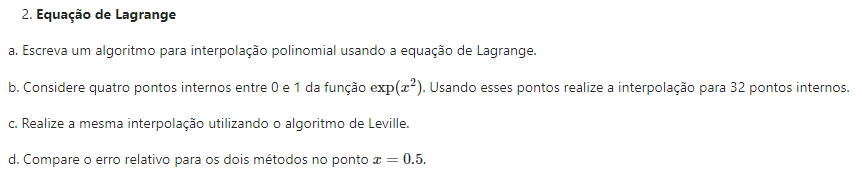

In [10]:
def interpol_lagrange(xa, ya, x): # array dos valores de x, array dos valores de y e valor de x onde se quer estimar f(x)
  n = xa.size ### Tamanho do array
  soma = 0 
  
  for i in range(0, n):
    prod = 1
    for k in range(0, n):
      if (i != k):
        prod = prod*((x - xa[k])/(xa[i] - xa[k])) 
    soma += ya[i] * prod

  return soma ### Retorna o Pn(x)

In [11]:
x_1 = np.linspace(0,1, 4)
def func(x):
  return np.exp(x**2)
xnovo = np.linspace(0,1, 32)
pol = np.zeros_like(xnovo)
for i in range(len(xnovo)):
  pol[i] = interpol_lagrange(x_1, func(x_1), xnovo[i])

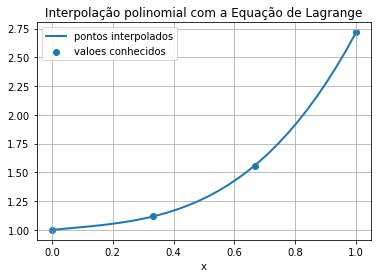

In [12]:
plt.scatter(x_1,func(x_1), label='valoes conhecidos')
plt.plot(xnovo,pol, '-', lw=2, label='pontos interpolados')
plt.xlabel('x')
plt.title('Interpolação polinomial com a Equação de Lagrange')
plt.legend()
plt.grid()

In [13]:
### Agora fazendo a mesma interpolação usando o Algoritmo de Neville:
pol_nev = np.zeros_like(xnovo)
erro = np.zeros_like(xnovo)
y = func(x_1)
for p in range(len(xnovo)):
  pol_nev[p], erro[p] = polint(x_1, y, xnovo[p])

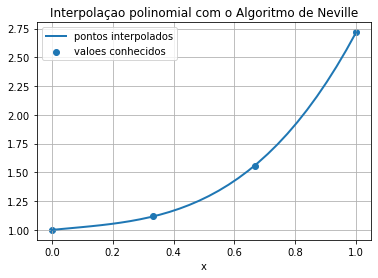

In [14]:
plt.scatter(x_1,func(x_1), label='valoes conhecidos')
plt.plot(xnovo,pol_nev, '-', lw=2, label='pontos interpolados')
plt.xlabel('x')
plt.title('Interpolaçao polinomial com o Algoritmo de Neville')
plt.legend()
plt.grid()

Ambos métodos aparentam produzir curvas muito parecidas, podemos confirmar se a qualidade de ambos é equivalente, por meio do cálculo do erro relativo.

Erro relativo do algoritmo de neville para x = 0.5:  0.010525337395319356 
Erro relativo do polinômio de Lagrange para x = 0.5: 0.010525337395319356


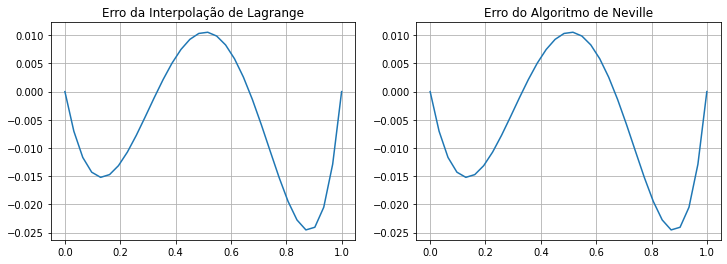

In [15]:
polin = np.zeros_like(xnovo)
nev = np.zeros_like(xnovo)
for j in range(0, len(xnovo)):
  polin[j] = interpol_lagrange(x_1, y, xnovo[j])
  nev[j], m = polint(x_1, y, xnovo[j])
erro_pol = [func(xnovo)[i] - polin[i] for i in range(len(xnovo))]
erro_nev = [func(xnovo)[i] - polin[i] for i in range(len(xnovo))]
fig, ax = plt.subplots(1,2, figsize = (12,4))
ax[0].plot(xnovo, erro_pol)
ax[0].set_title('Erro da Interpolação de Lagrange')
ax[1].plot(xnovo, erro_nev)
ax[1].set_title('Erro do Algoritmo de Neville')
ax[0].grid()
ax[1].grid()
a,b = polint(x_1, y, 0.5)
erro_pol5 = func(0.5)  - interpol_lagrange(x_1, y, 0.5)
erro_nev5 = func(0.5) - a
print(f'Erro relativo do algoritmo de neville para x = 0.5:  {erro_nev5} \nErro relativo do polinômio de Lagrange para x = 0.5: {erro_pol5}')

A partir do gráfico dos erros percebe-se que ambos métodos possuem o mesmo erro relativo. Isso é notável, também para o ponto que deseja-se analisar: $x = 0.5$, em que eles são iguais. 